# Описание проекта
**Краткое описание:** Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки интернет-магазина.


**Цели исследования:** 
* приоритизировать гипотезы;
* провести A/B-тест;
* проанализировать результаты.
 
**Описание данных:**

Содержание файла hypothesis.csv:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.Чем больше значение Efforts, тем дороже проверка гипотезы.

Содержание файла orders.csv:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Содержание файла visitors.csv:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Ход исследования:**

*Приоритезация гипотез:*
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Проанализировать, сделать выводы.

*Анализ A/B теста:*
* Провести предобработку данных.
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построить график кумулятивного среднего количества заказов по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
* Проанализировать, сделать выводы. Принять одно из решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


## Приоритезация гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

In [2]:
#Открываем файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
orders = pd.read_csv('/datasets/orders.csv') 
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# Снимаем ограничения на отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Приводим столбцы к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis #ознакомление с таблицей гипотез

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Добавим оценку гипотез по методикам ICE и RICE в таблицу с гипотезами

In [6]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Гипотезы под номерами 8,0 и 7 являются наиболее предпочтительными исходя из методики ICE.

In [7]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Гипотезы под номерами 7,2,0 и 6 являются наиболее предпочтительными исходя из методики RICE.

### Выводы:

При применении методики RICE гипотеза №7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) оказалась на первом месте с большим отрывом от второго места (112 против 56), так как ее охват гораздо больше чем у остальных гипотез, в то же время гипотеза №8 (Запустить акцию, дающую скидку на товар в день рождения) имеет наименьший охват, поэтому при расчете приоритетности гипотез по методике ICE она оказалась на первом месте в связи с высокими показателями влияния и уверенности, но опустилась на третье в методике RICE в связи с малым охватом

## Проведение A/B-теста

### Предобработка данных

In [8]:
# Вывод общей информации о таблице с заказами
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# Вывод общей информации о таблице с посетителями
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

пропуски в данных отсутствуют

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
# проверка дубликатов
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

In [14]:
# проверка регистра в столбцах
display(orders.columns)
visitors.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Index(['date', 'group', 'visitors'], dtype='object')

In [15]:
#приведение столбцов в таблице orders к нижнему регистру
orders.columns = orders.columns.str.lower()

In [16]:
#приведение столбцов с датами к формату datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
groupA = orders[orders['group'] == 'A']['visitorid'].drop_duplicates()
groupB = orders[orders['group'] == 'B']['visitorid'].drop_duplicates()

In [18]:
groupA.count()

503

In [19]:
groupB.count()

586

группы отличаются на пятнадцать процентов, что довольно существенно.

In [20]:
duplicatedid = groupB.loc[groupB.isin(groupA)]

посчитали пересекающихся пользователей, поэтому следует их убрать из анализа. 

In [21]:
orders = orders.loc[~orders['visitorid'].isin(duplicatedid)]

In [22]:
display(orders[orders['group'] == 'A']['date'].max())
display(orders[orders['group'] == 'A']['date'].min())

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

In [23]:
display(orders[orders['group'] == 'B']['date'].max())
display(orders[orders['group'] == 'B']['date'].min())

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

даты проведения теста совпадают для обеих групп

### Построение графика кумулятивной выручки по группам.

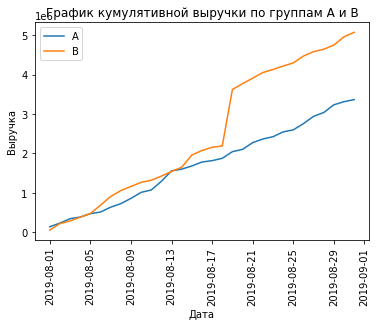

In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.xticks(rotation=90)
plt.show();

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Качественный график с точки зрения оформления. С ним твоим коллегам будет удобно работать    

**Вывод**: Несмотря на тот факт, что выручка группы B была изначально стабильно выше выручки группы A, резкий рост в середине выглядит необычно, что может быть вызвано аномально большими заказами в группе B.

### Построить график кумулятивного среднего чека по группам. 

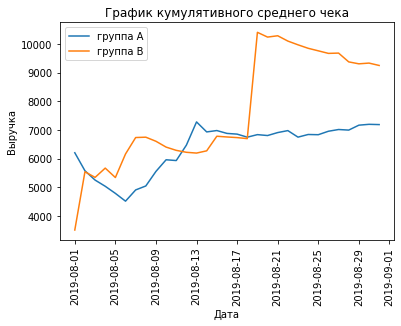

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')

plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation = 90)
plt.legend()
plt.show();

**Вывод**: график кумулятивного среднего чека подтверждает что в даты между 18 и 19 августа 2019 года произошел необычно резкий скачок выручки в группе B.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

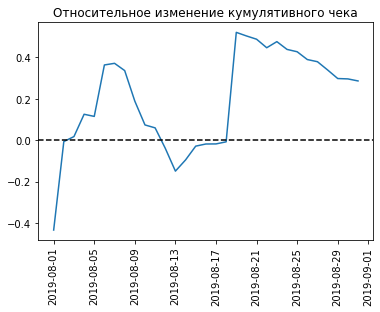

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного чека')
plt.xticks(rotation = 90); 

**Вывод**: на графике видны резкие изменения в показателях среднего чека, которые могут быть вызваны аномально большими покупками.

### Построить график кумулятивного среднего количества заказов по группам.

In [27]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


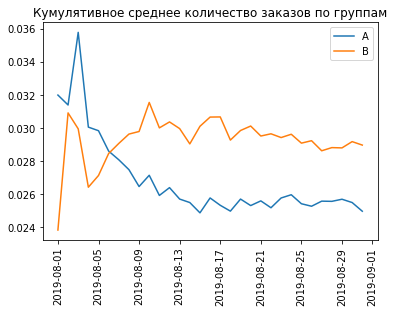

In [28]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']



# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='B')
plt.title('Кумулятивное среднее количество заказов по группам')
plt.xticks(rotation = 90)
plt.legend();




**Вывод** изначально показатели группы B были ниже, но потом значительно выросли.

### Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A.

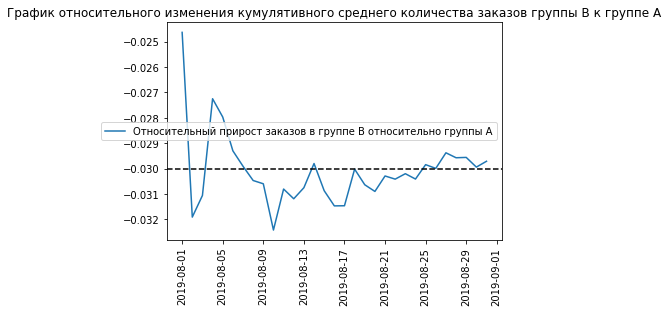

In [43]:
# Объединение таблиц cumulativeDataA и cumulativeDataB
mergedCumulativeOrders = cumulativeDataA[['date','orders','visitors']].merge(cumulativeDataB[['date','orders','visitors']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Построение графика
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/ mergedCumulativeOrders['visitorsB'])/(mergedCumulativeOrders['ordersA']/ mergedCumulativeOrders['visitorsA']-1), label="Относительный прирост заказов в группе B относительно группы A")

plt.axhline(y=-0.030, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.legend()
plt.xticks(rotation=90)
plt.show()

**Вывод**: видно, что постепенно показатели группы B выравниваются.

### Построить точечный график количества заказов по пользователям. 

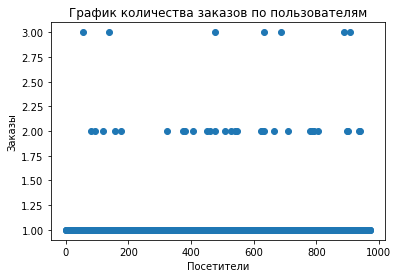

In [30]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Заказы')
plt.xlabel('Посетители')
plt.show()

**Вывод**: преимущественное количество пользователей не офомляло больше одного заказа, в то время как по графику видно, что назодились единичные пользователи оформляли более 10 заказов, поэтому нужно посчитать перцентили и, при необходимости, убрать таких пользователей из анализа.

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя.

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод**: не более 5 процентов пользователей сделали больше 1 заказа и лишь 1 процент пользователей сделали больше 2-ех заказов. 
В дальнейшем для целей анализа предлагаю считать выбросами тех пользователей, которые сделали больше 2-ух заказов.

### Построить точечный график стоимостей заказов. 

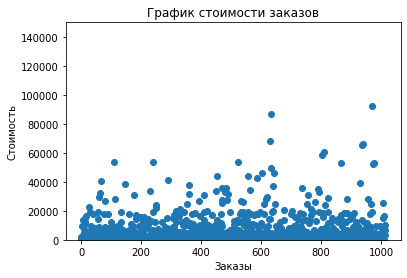

In [32]:
x_values = pd.Series(range(0, len(orders)))

plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.ylabel('Стоимость')
plt.ylim(0,150000)
plt.xlabel('Заказы')
plt.show()

**Вывод**: большая часть пользоователей делает заказы на сумму, не превышающую 20 000 рублей, но для того, чтобы идентифицировать выбросы, необходимо обратиться к перцентилям. 

### Посчитать 95-й и 99-й перцентили стоимости заказов.

In [33]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод**: не более пяти процентов пользователей совершают заказы на сумму больше чем  26 785 рублей и лишь один процет на сумму выше 53 904 рублей, поэтому для целей дальнейшего анализа предлагаю считать тех пользователей, кто заказал на сумму свыше 26 785 рублей, выбросами.

### Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.

Нулевая гипотеза: в группах А и B нет различий в среднем количестве заказов.  
Альтернативная гипотеза: в группах A и В есть различия в среднем количестве заказов.  
В целях статистического анализа определим уровень статистической значимости a = 0.05

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print('p-value = ',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница = ',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))



p-value =  0.01102
Относительная разница =  0.160


**Вывод**: p-value ниже уровня альфа, поэтому мы можем отвергнуть нулевую гипотезу в пользу того, что между группами есть статистическая разница.
Относительная разница составляет 13 процентов в пользу группы B.

### Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.

Нулевая гипотеза: в группах А и B нет различий в среднем количестве заказов.  
Альтернативная гипотеза: в группах A и В есть различия в среднем количестве заказов.  
В целях статистического анализа определим уровень статистической значимости a = 0.05

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorid']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
[
    ordersByUsersA[
        np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
        0,
        index = np.arange(
        visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders',
        ),
    ],
    axis = 0
)
    
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.01235
Относительная разница = 0.182


**Вывод**: даже по очищенным данным видно, что p-value ниже уровня альфа, поэтому мы можем отвергнуть нулевую гипотезу в пользу того, что между группами есть статистическая разница.
Относительная разница составляет 18 процентов в пользу группы B.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: в группах А и B нет различий в среднем чеке заказа.  
Альтернативная гипотеза: в группах A и В есть различия в среднем чеке заказа.  
В целях статистического анализа определим уровень статистической значимости a = 0.05

In [36]:
print('p-value =','{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])) 
print('Относительная разница = ','{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

p-value = 0.82949
Относительная разница =  0.287


**Вывод**: несмотря на высокий пооказатель относительной разницы, мы не можем отвергнуть нулевую гипотезу в связи с очень высоким показателем p-value.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза: в группах А и B нет различий в среднем чеке заказа.  
Альтернативная гипотеза: в группах A и В есть различия в среднем чеке заказа.  
В целях статистического анализа определим уровень статистической значимости a = 0.05

In [37]:
print('p-value =',
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Отноосительная разница = ',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.64590
Отноосительная разница =  -0.048


**Вывод**: мы не можем отвергнуть нулевую гипотезу в связи с очень высоким показателем p-value, однако показатель разницы стал практически нулевым в связи с тем, что мы убрали выбросы из анализа.

## Вывод

#### В рамках подготовки к A/B тесту группы были разделены некорректно, так как одна группа (B) больше другой (A) на двадцать процентов, что может влиять на результаты теста, которые мы получили. Также 92 пользователя в группах пересекались, поэтому они были исключены из анализа, так как их поведение мы оценивать не можем. 
#### По результатам анализа очищенных и сырых данных наблюдается статистическая разница в среднем количестве заказов между группами А и В в пользу последней в размере 13%. Данное значение зафиксировалось и держится на этом уровне без колебаний.  
#### Результаты анализа очищенных и сырых данных не показали статистической разница между средним чеком группы А и B. Вероятно, что на графиках выручки и среднего чека, наблюдаются выбросы, не обусловленные проведением A/ B теста. 
#### Тест можно признать успешным и остановить его, так как результаты группы B по среднему количеству заказов стабильно лучше группы А.
